# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
It groups *densely grouped* data points into a single cluster. It can ientify large clusters in large spatial datasets by looking at the local density of the data points. 

The most exciting feature of DBSCAN is that is is *robust to outliers*. It also does *not require number of clusters to be defined* beforehand, unlike K-Means Clustering.

DBSCAN only requires two parameters: $\epsilon$ and *minPoints*. $\epsilon$ is the radius of the circle to be created around each data point to check the density and **minPoints** is the minimum number of data points required inside that circle for that data point to be classified as a **core point**.

* **Core point**: A data point is a core point if the circle around it contains at least *minPoint* number of points.
* **Border point**: If the number of points in the circle is less than *minPoint* then it is a border point.
* **Noise**: All other points are noise.

![working](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png)

For locating data points in space, DBSCAN uses *Euclidean distance*.


### Reachability and Connectivity
* **Reachability**: It states if a data point can be accessed from another data point directly or indirectly.
* **Connectivity**: It states whether two data points belong to the same cluster or not.

Two points in DBSCAN can be referred to as:
1. **Directly Density-Reachable**: A point $X$ is directly density-reachable from point $Y$ w.r.t. $\epsilon \text{, minPoints}$ if, <br>
   i. $X$ belongs to neighborhood of $Y$, i.e., $\text{dist(X, Y)} \le \epsilon \\$
   ii. $Y$ is a core point
   
   ![directly density reachable](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db10.png)

2. **Density-Reachable**: A point $X$ is density-reachable from $Y$ w.r.t. $\epsilon \text{, minPoints}$ if there is a chain of points $P_1, P_2, P_3, ..., P_n$ and $P_1 = X$ and $P_n = Y$ such that $P_{i+1}$ is directly density-reachable from $P_i$.

![density-reachable](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db11.png)

3. **Density Connected**: A point $X$ is density connected from point $Y$ w.r.t. $\epsilon \text{, minPoints}$ if there is a point $O$ such that both $X$ and $Y$ are density-reachable from $O$ w.r.t. $\epsilon \text{, minPoints}$.

![density connected](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db12.png)


### Parameter Selection for DBSCAN
DBSCAN is very sensitive to the values of $\epsilon$ and *minPoints*. A slight variation in these values can significantly change the results produced by the algorithm.

$\text{minPoints } \ge \text{dimensions}+1$

It doesnt make sense to take *minPoints* as 1 because it will result in each point being a separate cluster. Therefore, it must be atleast 3. Generally, it is twice the dimensions. But domain knowledge also decides its value.

The value of $\epsilon$ can be decided from the K-distance graph. The point of maximum curvature (elbow) in the graph tells us the value of $\epsilon$. If the value of $\epsilon$ chosen is too small then a higher number of clusters will be created and more data points will be taken as noise. Whereas, if chosen too big then various small clusters will merge into a big cluster, and we will lose details.

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

%matplotlib inline

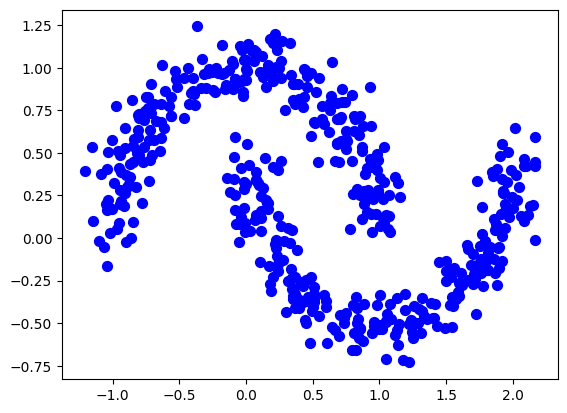

In [2]:
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')

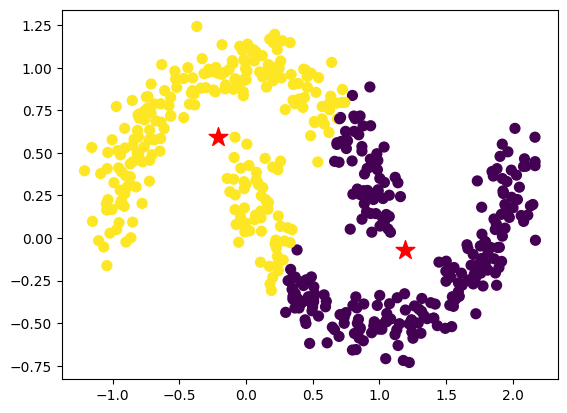

In [3]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200)

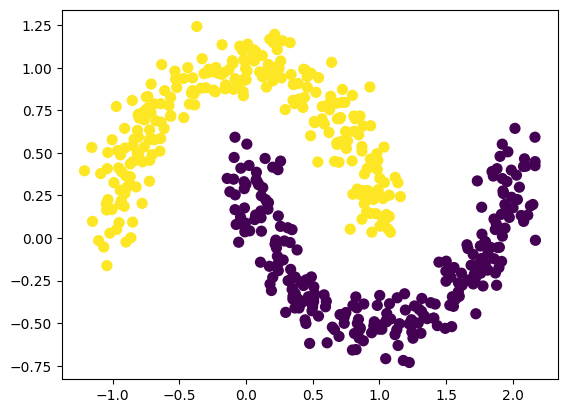

In [7]:
dbscan = DBSCAN(eps=0.2, min_samples=8)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [8]:
np.random.seed(42)

def create_data(r, n=100):
    return [
        (
            np.cos(2*np.pi/n*x)*r+np.random.normal(-30, 30),
            np.sin(2*np.pi/n*x)*r+np.random.normal(-30, 30)
        )
        for x in range(1, n+1)
    ]

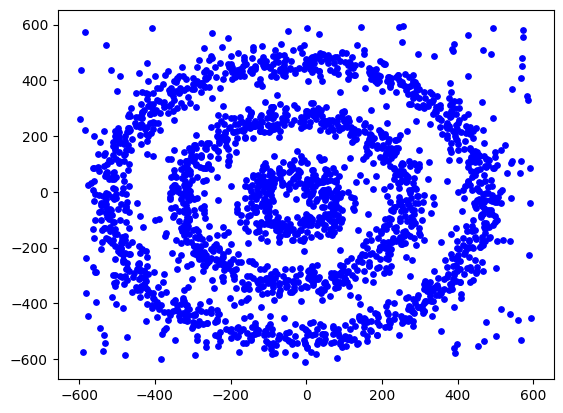

In [9]:
X = pd.concat([
    pd.DataFrame(create_data(500, 1000)),
    pd.DataFrame(create_data(300, 700)),
    pd.DataFrame(create_data(100, 300)),
    pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])
])

plt.scatter(X[0], X[1], s=15, c='b')


/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


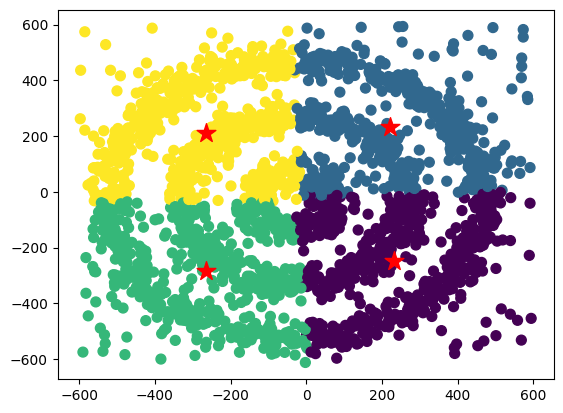

In [10]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[0], X[1], c=labels, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200)

/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


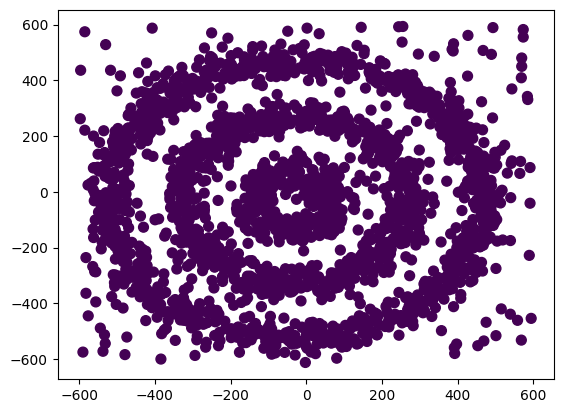

In [11]:
dbscan = DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='manhattan', min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[0], X[1], c=labels, s=50, cmap='viridis')

/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/kunalkumarsahoo/mambaforge/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


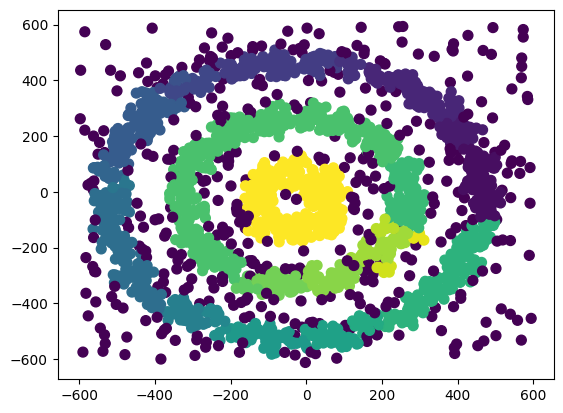

In [12]:
dbscan = DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='manhattan', min_samples=6)
labels = dbscan.fit_predict(X)

plt.scatter(X[0], X[1], c=labels, s=50, cmap='viridis')